### References

**Book:**
- Deep Learning with Python, Second Edition
  - Book by François Chollet
  - François Chollet is a French software engineer and artificial intelligence researcher currently working at Google. Chollet is the creator of the Keras deep-learning library, released in 2015, and a main contributor to the TensorFlow machine learning framework.


### Code

We’ll build a model to classify Reuters newswires into 46 mutually exclusive topics.

Reuters dataset, a set of short newswires and their topics, published by Reuters in 1986.

There are 46 different topics; some topics are more represented than others, but each topic has at least 10 examples in the training set.

In [38]:
# Imports
from tensorflow.keras.datasets import reuters
import numpy as np
import matplotlib.pyplot as plt
import copy

from tensorflow.keras.utils import to_categorical
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
# Loading Dataset
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
num_words=10000)

2110848/2110848 [==============================] - 4s 2us/step


In [5]:
print(train_data.shape)
print(train_labels.shape)

print(test_data.shape)
print(test_labels.shape)

(8982,)
(8982,)
(2246,)
(2246,)


In [16]:
print(train_data[0:5])
print(train_labels[0:5])

[list([1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12])
 list([1, 3267, 699, 3434, 2295, 56, 2, 7511, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 2, 49, 2295, 2, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 2, 2, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12])
 list([1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32, 818, 15, 14, 272, 26, 39, 684, 70, 11, 14, 12, 3886, 18, 180, 183, 187, 70, 11, 14, 102, 32, 11, 29, 53, 44, 704, 15, 14, 19, 758, 15, 53, 959, 47, 1013, 15, 14, 19, 132, 15, 39, 965, 32, 11, 14, 147, 72, 11, 180, 183, 187, 44, 11, 14, 102, 19, 11, 123, 186, 90, 67, 960, 4, 78, 13, 68, 467, 511, 110, 59, 89, 90, 67, 139

In [10]:
print(train_data[0])
print(len(train_data[0]))

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
87


In [15]:
# Decoding newswires back to text

word_index = reuters.get_word_index()
print(list(word_index.keys())[:5],"\n")

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
print(list(reverse_word_index.keys())[:5],"\n")

decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[0]])
print(decoded_newswire, "\n")

['mdbl', 'fawc', 'degussa', 'woods', 'hanging'] 

[10996, 16260, 12089, 8803, 13796] 

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3 



In [19]:
# Input Vectorizer

def vectorize_sequences(sequences, dimension=10000):
    # Zeros tensor
    results = np.zeros((len(sequences), dimension))
    # Replacing ones
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

In [20]:
# Encoding the input data

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

To vectorize the labels, there are two possibilities: 

You can cast the label list as an integer tensor, or you can use one-hot encoding.

One-hot encoding is a widely used format for categorical data, also called categorical encoding. 

In this case, one-hot encoding of the labels consists of embedding each label as an all-zero vector with a 1 in the place of the label index

In [21]:
# Encoding the labels

def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))

    for i, label in enumerate(labels):
        results[i, label] = 1.
    
    return results

In [22]:
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [24]:
print(y_train[0])

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


There is a built-in way to do this in Keras.

In [26]:
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [27]:
print(y_train[0])

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [29]:
# Model

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

The model will output a probability distribution over the 46 different output classes.

For every input sample, the model will produce a 46-dimensional output vector, where output[i] is the probability that the sample belongs to class i.

The 46 scores will sum to 1.

The best loss function to use in this case is categorical_crossentropy. 

It measures the distance between two probability distributions: here, between the probability distribution output by the model and the true distribution of the labels.

By minimizing the distance between these two distributions, you train the model to output something as close as possible to the true labels.

In [30]:
# Compiling the model

model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [31]:
# Separate validation dataset from train dataset

x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [32]:
# Training the model

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20


16/16 [==============================] - 3s 93ms/step - loss: 2.7529 - accuracy: 0.5064 - val_loss: 1.8884 - val_accuracy: 0.6050
Epoch 2/20
16/16 [==============================] - 1s 38ms/step - loss: 1.5528 - accuracy: 0.6809 - val_loss: 1.4017 - val_accuracy: 0.6900
Epoch 3/20
16/16 [==============================] - 1s 33ms/step - loss: 1.1654 - accuracy: 0.7423 - val_loss: 1.2163 - val_accuracy: 0.7200
Epoch 4/20
16/16 [==============================] - 1s 36ms/step - loss: 0.9385 - accuracy: 0.7885 - val_loss: 1.0936 - val_accuracy: 0.7560
Epoch 5/20
16/16 [==============================] - 1s 43ms/step - loss: 0.7749 - accuracy: 0.8329 - val_loss: 1.0022 - val_accuracy: 0.7910
Epoch 6/20
16/16 [==============================] - 1s 39ms/step - loss: 0.6390 - accuracy: 0.8654 - val_loss: 0.9513 - val_accuracy: 0.7960
Epoch 7/20
16/16 [==============================] - 1s 33ms/step - loss: 0.5338 - accuracy: 0.8872 - val_loss: 0.9307 - val_accuracy: 0.8020
Epoch 8/20


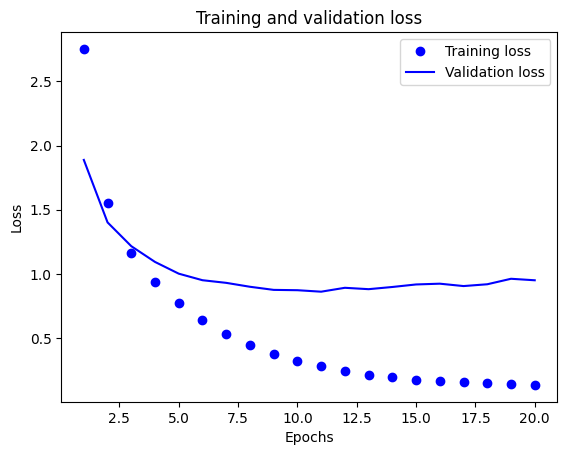

In [34]:
# Plotting the training and validation loss

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

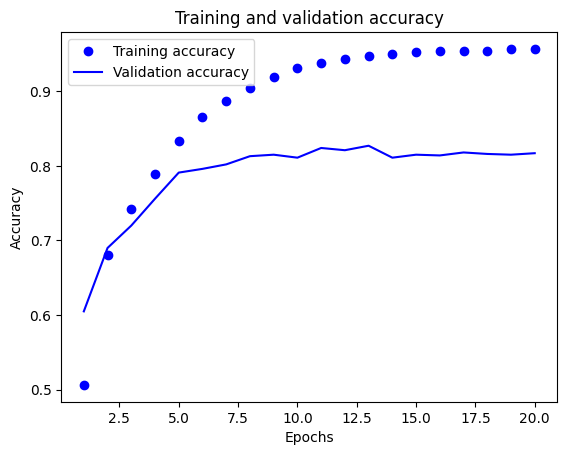

In [35]:
# Plotting the training and validation accuracy

plt.clf()

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

The model begins to overfit after nine epochs. 

Let’s train a new model from scratch for nine epochs and then evaluate it on the test set.

In [37]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
    ])

model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)

print("\nEvaluation")
results = model.evaluate(x_test, y_test)
print(results)

Epoch 1/9
18/18 [==============================] - 1s 31ms/step - loss: 2.6233 - accuracy: 0.5186
Epoch 2/9
18/18 [==============================] - 1s 30ms/step - loss: 1.4388 - accuracy: 0.6987
Epoch 3/9
18/18 [==============================] - 1s 28ms/step - loss: 1.1016 - accuracy: 0.7616
Epoch 4/9
18/18 [==============================] - 1s 36ms/step - loss: 0.8959 - accuracy: 0.8065
Epoch 5/9
18/18 [==============================] - 1s 30ms/step - loss: 0.7399 - accuracy: 0.8398
Epoch 6/9
18/18 [==============================] - 1s 30ms/step - loss: 0.6153 - accuracy: 0.8647
Epoch 7/9
18/18 [==============================] - 1s 30ms/step - loss: 0.5118 - accuracy: 0.8902
Epoch 8/9
18/18 [==============================] - 1s 32ms/step - loss: 0.4323 - accuracy: 0.9080
Epoch 9/9
18/18 [==============================] - 1s 28ms/step - loss: 0.3628 - accuracy: 0.9226

Evaluation
71/71 [==============================] - 1s 7ms/step - loss: 0.8986 - accuracy: 0.7939
[0.8986026048660278

With a balanced binary classification problem, the accuracy reached by a purely random classifier would be 50%.

But in this case, we have 46 classes, and they may not be equally represented. 

What would be the accuracy of a random baseline? We could try quickly implementing one to check this empirically.

In [44]:
# Making a copy of the test labels and save it in separate variable test_labels_copy
test_labels_copy = copy.copy(test_labels)

# Randomly shuffling the test_labels_copy
# This will represent the output of a random classifier
np.random.shuffle(test_labels_copy)

print(test_labels[:10], "\n")
print(test_labels_copy[:10], "\n")

# Comparing the labels of True and Random Classifier
hits_array = np.array(test_labels) == np.array(test_labels_copy)

print(hits_array[:10])

hits_array.mean()

[ 3 10  1  4  4  3  3  3  3  3] 

[ 9  3  3 21  4 32 19 19  3  6] 

[False False False False  True False False False  True False]


0.19634906500445237

A random classifier would score around 19% classification accuracy.

So the results of our model seem pretty good in that light.

In [45]:
# Generating predictions on new data
# For now we will our test data itself

predictions = model.predict(x_test)

71/71 [==============================] - 0s 4ms/step


In [50]:
print(predictions[0].shape)
print(predictions[0])

(46,)
[3.18743187e-05 2.99078209e-04 1.97809477e-05 5.56161582e-01
 4.16056097e-01 2.13741150e-05 1.94125270e-04 1.18847202e-04
 1.16298366e-02 1.17148906e-04 1.27743973e-04 6.71055925e-04
 1.26880477e-04 5.73502213e-04 8.59700158e-05 7.86819437e-05
 4.93625179e-03 2.20273476e-04 6.45334076e-05 2.76452606e-03
 1.12361438e-03 2.02116775e-04 1.33674948e-05 9.94507340e-04
 1.29259148e-04 2.18123881e-04 7.76149318e-05 2.93106568e-04
 2.89184158e-04 8.32833612e-05 1.27901716e-04 1.13006419e-04
 4.80124087e-04 3.08473391e-05 1.45675338e-04 1.33803760e-05
 2.98311177e-04 1.55200338e-04 3.30458570e-05 3.61786515e-04
 1.92625128e-04 1.22585450e-04 6.88737491e-05 7.67172824e-05
 2.89007276e-05 2.76656447e-05]


In [51]:
# The coefficients in this vector sum to 1
print(np.sum(predictions[0]))

1.0


In [52]:
# The largest entry is the predicted class
print(np.argmax(predictions[0]))

3


**A different way to handle the labels and the loss**

We mentioned earlier that another way to encode the labels would be to cast them as an integer tensor.

In [54]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [57]:
print(y_train.shape)
print(y_train[:10])

(8982,)
[ 3  4  3  4  4  4  4  3  3 16]


The only thing this approach would change is the choice of the loss function.

`categorical_crossentropy` expects the labels to follow a categorical encoding. With integer labels, you should use `sparse_categorical_crossentropy`.

In [58]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

**The importance of having sufficiently large intermediate layers**

The final outputs are 46-dimensional; You should avoid intermediate layers with many fewer than 46 units. 

Now let’s see what happens when we introduce an information bottleneck by having intermediate layers that are significantly less than 46-dimensional.

In [53]:
model = keras.Sequential([
     layers.Dense(64, activation="relu"),
     layers.Dense(4, activation="relu"),
     layers.Dense(46, activation="softmax")
     ])

model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 2s 24ms/step - loss: 3.4192 - accuracy: 0.0586 - val_loss: 2.9587 - val_accuracy: 0.0990
Epoch 2/20
63/63 [==============================] - 1s 17ms/step - loss: 2.2886 - accuracy: 0.4523 - val_loss: 1.7969 - val_accuracy: 0.5760
Epoch 3/20
63/63 [==============================] - 1s 19ms/step - loss: 1.5238 - accuracy: 0.6445 - val_loss: 1.4882 - val_accuracy: 0.6450
Epoch 4/20
63/63 [==============================] - 1s 20ms/step - loss: 1.3044 - accuracy: 0.6749 - val_loss: 1.4207 - val_accuracy: 0.6510
Epoch 5/20
63/63 [==============================] - 1s 16ms/step - loss: 1.1971 - accuracy: 0.6838 - val_loss: 1.3813 - val_accuracy: 0.6540
Epoch 6/20
63/63 [==============================] - 1s 17ms/step - loss: 1.1224 - accuracy: 0.6959 - val_loss: 1.3589 - val_accuracy: 0.6620
Epoch 7/20
63/63 [==============================] - 1s 16ms/step - loss: 1.0641 - accuracy: 0.7081 - val_loss: 1.3501 - val_accuracy: 0.6620
Epoch 8/20
63

There is a significant drop in performance.

This drop is mostly due to the fact that we’re trying to compress a lot of information (enough information to recover the separation hyperplanes of 46 classes) into an intermediate space that is too low-dimensional. 

The model is able to cram most of the necessary information into these four-dimensional representations, but not all of it.